In [1]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.io as sio
from xmitgcm import open_mdsdataset
import pandas as pd
import xarray as xr
from scipy import interpolate
from floater import rclv_zwd
from skimage import measure
from copy import deepcopy
import time
import seaborn

In [131]:
plt.rcParams.update({'font.size': 14, 'legend.markerscale': 1., 'axes.titlesize': 14, 'axes.labelsize': 14,
                     'legend.fontsize': 12, 'legend.handlelength': 2})

plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)

## RCLV

In [69]:
lk0 = 0
lk0_err = 0
in0 = 0
in0_err = 0
day0 = np.NaN

## overlapping

In [54]:
flux1 = np.load('/home/tls2913/scripts/RCLV/statistics_2d/rclv_30_0.1/flux1.npy')[1:, :]
flux2 = np.load('/home/tls2913/scripts/RCLV/statistics_2d/rclv_30_0.1/flux2.npy')[1:, :]

flux1_new = deepcopy(flux1)
flux2_new = deepcopy(flux2)

for i in np.arange(flux1_new.shape[0]):

    if flux1[i, 3] == 0:
        flux1_new[i, 3:] = np.nan
    else:
        flux1_new[i, 3:] = flux1_new[i, 3:] / flux1[i, 3]
        flux2_new[i, 3:] = flux2_new[i, 3:] / flux1[i, 3]
        
for i in np.arange(flux1_new.shape[0]):
    if flux2_new[i, -1] > 10:
        print(i)
        flux2_new[i, :] = np.nan

flux1_mean = np.nanmean(flux1[:, 3:], 0) / np.nanmean(flux1[:, 3], 0)
flux2_mean = np.nanmean(flux2[:, 3:], 0) / np.nanmean(flux1[:, 3], 0)

flux1_mean_err = np.zeros((3, 6))
flux2_mean_err = np.zeros((3, 6))
tt = np.arange(30) + 1

dnum = 0
for day in np.arange(5, 31, 5):
    flux1_mean_err[0, dnum] = tt[day-1]
    flux1_mean_err[1, dnum] = flux1_mean[day-1]
    flux1_mean_err[2, dnum] = np.nanstd(flux1_new[:, day+2])
    flux2_mean_err[0, dnum] = tt[day-1]
    flux2_mean_err[1, dnum] = flux2_mean[day-1]
    flux2_mean_err[2, dnum] = np.nanstd(flux2_new[:, day+2])
    dnum = dnum + 1

299
926
945
1036
1125
1330


In [55]:
lk1 = 0.47309
lk1_err = 0.23336
in1 = 0.62476
in1_err = 0.87902
day1 = 20

## non-overlapping

In [44]:
flux1 = np.load('/home/tls2913/scripts/RCLV/statistics_2d/rclv_30_0.1/flux1_unoverlap.npy')[1:, :]
flux2 = np.load('/home/tls2913/scripts/RCLV/statistics_2d/rclv_30_0.1/flux2_unoverlap.npy')[1:, :]

flux1_new = deepcopy(flux1)
flux2_new = deepcopy(flux2)


for i in np.arange(flux1_new.shape[0]):

    if flux1[i, 3] == 0:
        flux1_new[i, 3:] = np.nan
    else:
        flux1_new[i, 3:] = flux1_new[i, 3:] / flux1[i, 3]
        flux2_new[i, 3:] = flux2_new[i, 3:] / flux1[i, 3]

# check flux2_new
for i in np.arange(flux1_new.shape[0]):
    if flux2_new[i, -1] > 10:
        print(i)
        flux2_new[i, :] = np.nan

flux1_mean = np.nanmean(flux1[:, 3:], 0) / np.nanmean(flux1[:, 3], 0)


flux2_mean = np.nanmean(flux2[:, 3:], 0) / np.nanmean(flux1[:, 3], 0)


tt = np.arange(30) + 1

# -----------------------------

flux1_mean_err = np.zeros((3, 6))
flux2_mean_err = np.zeros((3, 6))

dnum = 0
for day in np.arange(5, 31, 5):
    flux1_mean_err[0, dnum] = tt[day-1]
    flux1_mean_err[1, dnum] = flux1_mean[day-1]
    flux1_mean_err[2, dnum] = np.nanstd(flux1_new[:, day+2])
    flux2_mean_err[0, dnum] = tt[day-1]
    flux2_mean_err[1, dnum] = flux2_mean[day-1]
    flux2_mean_err[2, dnum] = np.nanstd(flux2_new[:, day+2])

    dnum = dnum + 1

24
154
431
539
1081
1128
1187
1333
1481
1524
1592
1638
1677
1760
1761
2036


In [53]:
lk2 = 0.3854
lk2_err = 0.2566
in2 = 0.8642
in2_err = 1.4847
day2 = 12

## fixed circles and moving circles

In [56]:
df_fix = pd.read_pickle('/home/tls2913/scripts/RCLV/statistics_2d/rclv_30_0.1/df_flux_fix.pkl')
df_moving = pd.read_pickle('/home/tls2913/scripts/RCLV/statistics_2d/rclv_30_0.1/df_flux_moving.pkl')

flux1_fix = np.zeros((df_fix.shape[0], 30))
flux1_fix_new = np.zeros((df_fix.shape[0], 30))

flux2_fix = np.zeros((df_fix.shape[0], 30))
flux2_fix_new = np.zeros((df_fix.shape[0], 30))

flux1_moving = np.zeros((df_moving.shape[0], 30))
flux1_moving_new = np.zeros((df_moving.shape[0], 30))

flux2_moving = np.zeros((df_moving.shape[0], 30))
flux2_moving_new = np.zeros((df_moving.shape[0], 30))

for i in np.arange(df_fix.shape[0]):
    
    flux1_fix[i, :] = df_fix.flux1.iloc[i]
    flux1_fix_new[i, :] = df_fix.flux1.iloc[i] / df_fix.flux1.iloc[i][0]

    flux2_fix[i, :] = df_fix.flux2.iloc[i]
    flux2_fix_new[i, :] = df_fix.flux2.iloc[i] / df_fix.flux1.iloc[i][0]
    
    flux1_moving[i, :] = df_moving.flux1.iloc[i]
    flux1_moving_new[i, :] = df_moving.flux1.iloc[i] / df_moving.flux1.iloc[i][0]

    flux2_moving[i, :] = df_moving.flux2.iloc[i]
    flux2_moving_new[i, :] = df_moving.flux2.iloc[i] / df_moving.flux1.iloc[i][0]
    
flux1_fix_mean = np.nanmean(flux1_fix, 0) / np.nanmean(flux1_fix[:, 0], 0)
flux2_fix_mean = np.nanmean(flux2_fix, 0) / np.nanmean(flux1_fix[:, 0], 0)

flux1_moving_mean = np.nanmean(flux1_moving, 0) / np.nanmean(flux1_moving[:, 0], 0)
flux2_moving_mean = np.nanmean(flux2_moving, 0) / np.nanmean(flux1_moving[:, 0], 0)

flux1_fix_mean_err = np.zeros((3, 6))
flux2_fix_mean_err = np.zeros((3, 6))

flux1_moving_mean_err = np.zeros((3, 6))
flux2_moving_mean_err = np.zeros((3, 6))

tt = np.arange(30) + 1

dnum = 0
for day in np.arange(5, 31, 5):
    flux1_fix_mean_err[0, dnum] = tt[day-1]
    flux1_fix_mean_err[1, dnum] = flux1_fix_mean[day-1]
    flux1_fix_mean_err[2, dnum] = np.std(flux1_fix_new[:, day-1])
    
    flux2_fix_mean_err[0, dnum] = tt[day-1]
    flux2_fix_mean_err[1, dnum] = flux2_fix_mean[day-1]
    flux2_fix_mean_err[2, dnum] = np.std(flux2_fix_new[:, day-1])
    
    flux1_moving_mean_err[0, dnum] = tt[day-1]
    flux1_moving_mean_err[1, dnum] = flux1_moving_mean[day-1]
    flux1_moving_mean_err[2, dnum] = np.std(flux1_moving_new[:, day-1])

    flux2_moving_mean_err[0, dnum] = tt[day-1]
    flux2_moving_mean_err[1, dnum] = flux2_moving_mean[day-1]
    flux2_moving_mean_err[2, dnum] = np.std(flux2_moving_new[:, day-1])
    
    dnum = dnum + 1

In [67]:
lk3 = 0.15079
lk3_err = 0.13507
in3 = 0.91626
in3_err = 0.2461
day3 = 8

In [68]:
lk4 = 0.3149
lk4_err = 0.15284
in4 = 0.7628
in4_err = 0.2536
day4 = 12

## bar plot

In [162]:
lk_means, lk_std = (lk0, 1-lk1, 1-lk2, 1-lk3, 1-lk4), (lk0_err, lk1_err, lk2_err, lk3_err, lk4_err)
in_means, in_std = (in0, in1, in2, in3, in4), (in0_err, in1_err, in2_err, in3_err, in4_err)
cday = (day0, day1, day2, day3, day4)
ind = np.arange(5)
width = 0.35

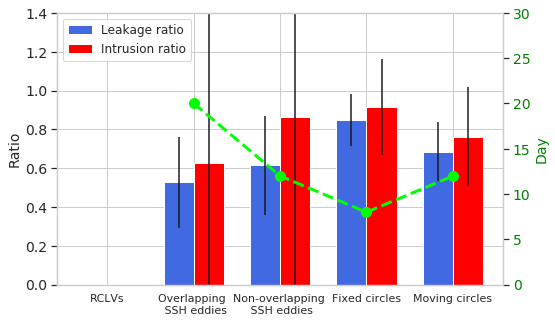

In [166]:
fig = plt.figure(figsize=(8, 5))
ax1 = plt.subplot(111)

rects1 = ax1.bar(ind - width/2, lk_means, width, yerr=lk_std, label='Leakage ratio', color='royalblue')
rects2 = ax1.bar(ind + width/2, in_means, width, yerr=in_std, label='Intrusion ratio', color='red')

ax1.set_ylim(0, 1.4)
ax1.legend(loc=2)
ax1.set_xticks(ind)
#ax1.set_xticklabels(('G1', 'G2', 'G3', 'G4', 'G5'))
#ax1.text(-0.3, 1.3, 'G1: RCLV', size=10, color='purple')
#ax1.text(-0.3, 1.2, 'G2: Overlapping SSH eddy', size=10, color='purple')
#ax1.text(-0.3, 1.1, 'G3: Non-overlapping SSH eddy', size=10, color='purple')
#ax1.text(-0.3, 1.0, 'G4: Fixed circle', size=10, color='purple')
#ax1.text(-0.3, 0.9, 'G5: Moving circle', size=10, color='purple')
ax1.set_xticklabels(labels=('RCLVs', 'Overlapping \n SSH eddies', 
                            'Non-overlapping \n SSH eddies', 'Fixed circles', 'Moving circles'), size=11)

#plt.grid()
#ax1.xticks(ticks=ind, labels=('G1', 'G2', 'G3', 'G4', 'G5'), size=12)
ax1.set_ylabel('Ratio')
ax2 = ax1.twinx()
ax2.plot(ind, cday, linestyle='--', marker='.', markersize=20, color='lime', linewidth=3)
ax2.set_ylabel('Day', color='green')
ax2.tick_params(axis='y', labelcolor='green')
ax2.set_ylim(0, 30)
ax2.grid()
plt.savefig('Figure_15.png', dpi=150, bbox_inches='tight')